## Week 12 Homework (10)

### Q1: define

- Gaussian Processes (GPs) and stochastic processes generally
- Variational inference using the Evidence Lower Bound (ELBO)

## Gaussian Processes and Variational Inference using the ELBO

### Gaussian Processes (GPs) and Stochastic Processes

A **stochastic process** is a collection of random variables $\{X_t\}_{t \in T}$ indexed over some domain $T$ (commonly time or space). It describes probabilistic evolution:

* e.g., the weather, stock prices, or any phenomenon that changes randomly over time or space.

A **Gaussian Process (GP)** is a specific kind of stochastic process such that for any finite subset $\{x_1, \dots, x_n\}$, the random vector $(f(x_1), \dots, f(x_n))$ has a multivariate Gaussian distribution.

It is fully specified by:

* a mean function: $m(x) = \mathbb{E}[f(x)]$
* a covariance function (kernel): $k(x, x') = \text{Cov}(f(x), f(x'))$

Thus:

$$f(x) \sim \mathcal{GP}(m(x), k(x, x'))$$

<font color='gray'>GPs define a distribution over functions and are used for Bayesian non-parametric regression—we infer a whole function, not just parameters.</font>

### Variational Inference (VI) and the Evidence Lower Bound (ELBO)

In Bayesian inference, computing the posterior $p(z|x)$ is often intractable. So, we approximate it by a simpler distribution $q(z)$ and optimize $q$ to be close to $p(z|x)$.

This leads to **Variational Inference**, where we define an optimization objective: the **ELBO** (Evidence Lower Bound) on the log marginal likelihood $\log p(x)$:

$$\log p(x) \ge \mathbb{E}_{q(z)}[\log p(x, z)] - \mathbb{E}_{q(z)}[\log q(z)] = \text{ELBO}(q)$$

which is equivalent to:

$$\text{ELBO}(q) = \log p(x) - \text{KL}(q(z) || p(z|x))$$

So, maximizing the ELBO ($\uparrow$) means minimizing the KL divergence $\text{KL}(q(z) || p(z|x))$ ($\downarrow$).

This represents a trade-off between fitting the data and keeping $q(z)$ simple and regularized.

<font color='gray'>This general idea ties to other approximate inference tools like the reparameterization trick, amortized inference, and even Bayesian neural networks.</font>


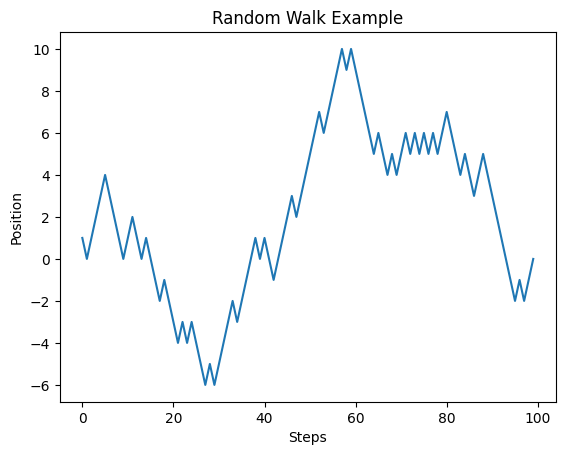

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Stoachistic Visualization
def random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    walk = np.cumsum(steps)
    return walk

walk = random_walk(100)
plt.plot(walk)
plt.xlabel("Steps")
plt.ylabel("Position")
plt.title("Random Walk Example")
plt.show()

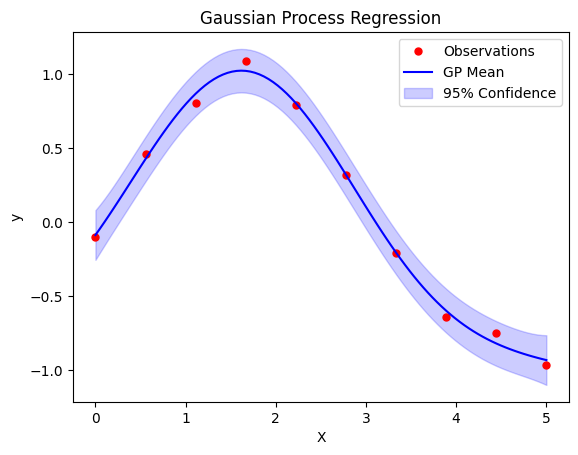

In [ ]:
# GR Regression Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Generate sample data
X = np.linspace(0, 5, 10).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Define the kernel and GP model
kernel = RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP model
gp.fit(X, y)

# Predict values and confidence intervals
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred, sigma = gp.predict(X_plot, return_std=True)

# Plot the results
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_plot, y_pred, 'b-', label='GP Mean')
plt.fill_between(X_plot.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='b', label='95% Confidence')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.show()

ELBO: -1.3068528194400546


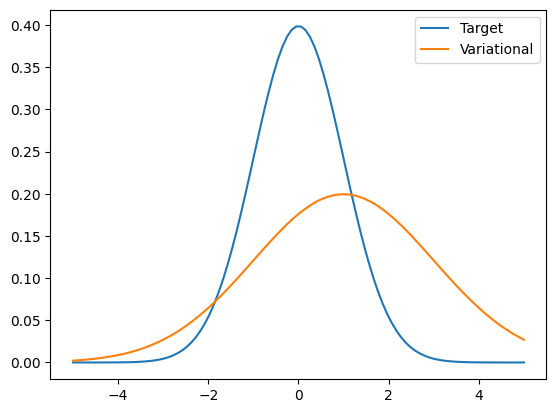

In [ ]:
# Variational Inference using the ELBO
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Target distribution.
target_mean = 0
target_std = 1

#Variational parameters.
variational_mean = 1.0
variational_std = 2.0

def calculate_elbo(variational_mean, variational_std, target_mean, target_std):
    kl_div = np.log(target_std / variational_std) + (variational_std**2 + (variational_mean - target_mean)**2) / (2 * target_std**2) - 0.5
    return -kl_div

elbo = calculate_elbo(variational_mean, variational_std, target_mean, target_std)
print(f"ELBO: {elbo}")

#Plot distributions.
x = np.linspace(-5, 5, 100)
plt.plot(x, norm.pdf(x, target_mean, target_std), label='Target')
plt.plot(x, norm.pdf(x, variational_mean, variational_std), label='Variational')
plt.legend()
plt.show()

### Q2: more GPs

Repurpose PyMC documentation to provide a demonstration of Gaussian processes for a different dataset context than the PyMC examples.

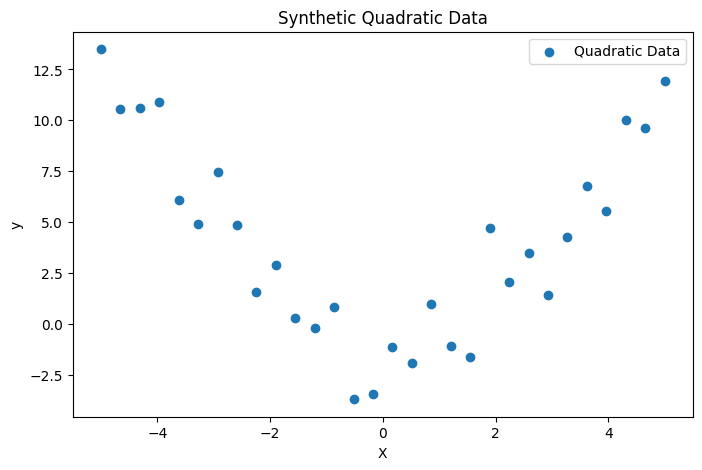

/usr/local/lib/python3.11/dist-packages/pymc/gp/gp.py:55: FutureWarning: The 'noise' parameter has been been changed to 'sigma' in order to standardize the GP API and will be deprecated in future releases.
  warnings.warn(_noise_deprecation_warning, FutureWarning)


Output()

Output()

Shape of pred_samples['f_pred']: (2, 500, 100)


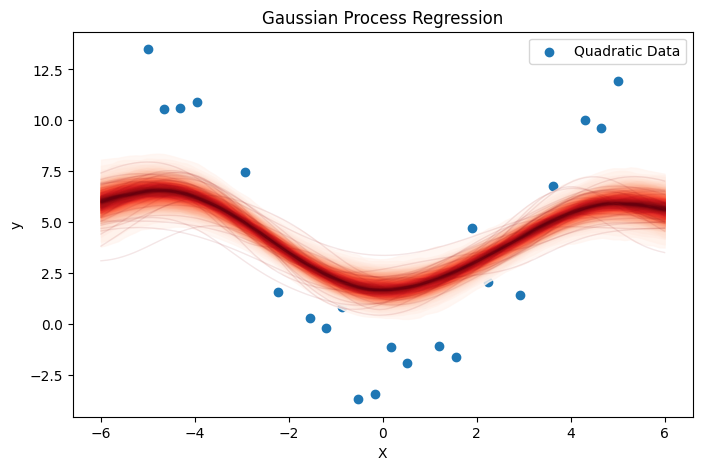

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c,4.606,0.817,3.095,6.067,0.026,0.023,991.0,783.0,1.0
ls,1.687,0.487,0.847,2.592,0.016,0.018,847.0,489.0,1.0
sigma,3.023,0.430,2.207,3.806,0.013,0.012,1096.0,709.0,1.0


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
from pymc.gp.util import plot_gp_dist
import arviz as az

# 1. Generate Synthetic Quadratic Data
np.random.seed(42)  # For reproducibility
X = np.linspace(-5, 5, 30)[:, None]  # 30 data points
y = 0.5 * X.ravel()**2 + np.random.normal(0, 2, X.shape[0])

# 2. Visualize the Data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, marker='o', label='Quadratic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Quadratic Data')
plt.legend()
plt.show()

# 3. Define the Gaussian Process Model
with pm.Model() as gp_model:
    mean_func = pm.gp.mean.Constant(c=pm.Normal('c', mu=0, sigma=10))
    cov_func = pm.gp.cov.ExpQuad(input_dim=1, ls=pm.Gamma('ls', alpha=2, beta=1))
    gp = pm.gp.Marginal(mean_func=mean_func, cov_func=cov_func)
    sigma = pm.HalfNormal('sigma', sigma=1)
    y_ = gp.marginal_likelihood('y', X=X, y=y, noise=sigma)

# 4. Fit the Model
with gp_model:
    trace = pm.sample(500, tune=500, return_inferencedata=True)

# 5. Predict on New Data
X_new = np.linspace(-6, 6, 100)[:, None]
with gp_model:
    f_pred = gp.conditional("f_pred", X_new)
    pred_samples = pm.sample_posterior_predictive(trace, var_names=['f_pred'])

print(f"Shape of pred_samples['f_pred']: {pred_samples.posterior_predictive['f_pred'].shape}")

# 6. Plot the Results
plt.figure(figsize=(8, 5))
plt.scatter(X, y, marker='o', label='Quadratic Data')

pred_samples_f_pred = pred_samples.posterior_predictive['f_pred']
if pred_samples_f_pred.ndim > 1:
    f_pred_mean = pred_samples_f_pred.mean(axis=0)
else:
    f_pred_mean = pred_samples_f_pred

plot_gp_dist(plt.gca(), f_pred_mean, X_new)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

# 7. Display Inference Information
az.summary(trace)

Gaussian Process (GP) regression model was applied to synthetic data generated from a quadratic function with added Gaussian noise. The resulting dataset displayed a parabolic trend with moderate variability. This non-linear structure makes it suitable for evaluating the flexibility of GP models in capturing smooth functional relationships while quantifying predictive uncertainty.

The GP model was defined using a constant mean function and an exponentiated quadratic (RBF) kernel, which assumes the underlying function is smooth. A HalfNormal prior was placed on the observation noise, allowing the model to account for random deviations in the observed data. Inference was performed using Hamiltonian Monte Carlo (HMC) with 500 posterior samples following a tuning period.

Visual inspection of the posterior predictive plot reveals that the GP accurately captures the U-shaped curvature of the underlying quadratic relationship. The model demonstrates low uncertainty in regions where training data is dense and increased uncertainty near the edges, where fewer or no observations are available. This behavior reflects the Bayesian nature of the GP, which adjusts confidence based on data availability.

Summary statistics from the posterior indicate a mean offset of approximately 4.61 for the constant mean function, with a standard deviation of 0.82. The inferred length scale parameter has a mean of approximately 1.69, suggesting that the model has learned a moderately flexible function capable of adapting to curvature in the data. The noise standard deviation was inferred to be around 3.02, closely matching the scale of the noise introduced during data generation. All posterior diagnostics, including effective sample size and $\hat{R}$ values, support the reliability and convergence of the model.

In conclusion, the GP model effectively captures the underlying nonlinear pattern in the data and provides well-calibrated uncertainty estimates. Its performance highlights the suitability of Gaussian Processes for regression tasks where the true function is smooth but unknown, and where predictive uncertainty plays a crucial role in interpretation.

### Q3: more VI/ELBO

Repurpose PyMC documentation to provide a demonstration of a neural network fit with variational inference for a different dataset context than the PyMC examples.


Output()

Output()

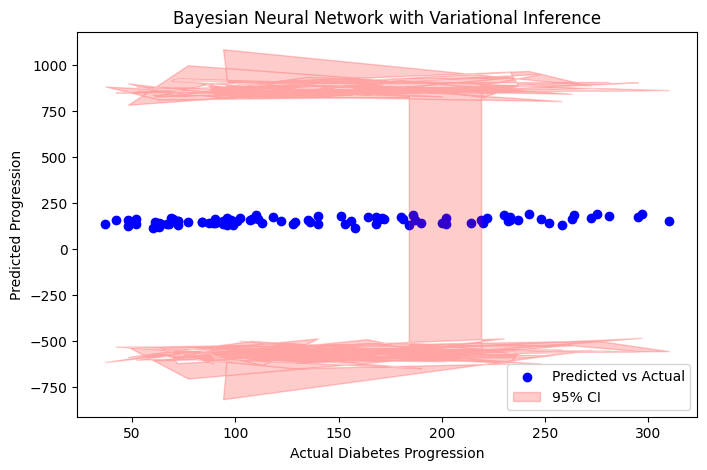

Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1[0],0.049,1.377,-2.526,2.562,0.044,0.028,975.0,858.0,NaN
b1[1],0.049,1.306,-2.254,2.505,0.040,0.030,1052.0,871.0,NaN
b1[2],-0.038,1.315,-2.551,2.310,0.044,0.030,888.0,942.0,NaN
b1[3],0.004,1.268,-2.181,2.445,0.038,0.030,1105.0,942.0,NaN
b1[4],-0.037,1.329,-2.569,2.359,0.047,0.031,816.0,1016.0,NaN
...,...,...,...,...,...,...,...,...,...
w2[0],0.045,1.072,-1.950,2.125,0.033,0.025,1029.0,943.0,NaN
w2[1],-0.015,1.071,-2.200,1.713,0.036,0.023,884.0,1023.0,NaN
w2[2],-0.059,1.018,-1.819,1.882,0.036,0.022,780.0,907.0,NaN
w2[3],0.051,1.054,-1.867,2.104,0.033,0.026,1005.0,944.0,NaN


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import pytensor.tensor as pt
import arviz as az
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load and Preprocess Diabetes Dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# NEW: Scale target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Split data
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# 2. Build Bayesian Neural Network
with pm.Model() as neural_network:
    X_data = pm.Data("X_data", X_train)
    y_data = pm.Data("y_data", y_train_scaled)

    n_hidden = 5
    w1 = pm.Normal("w1", mu=0, sigma=1, shape=(X_train.shape[1], n_hidden))
    b1 = pm.Normal("b1", mu=0, sigma=1, shape=(n_hidden,))

    w2 = pm.Normal("w2", mu=0, sigma=1, shape=(n_hidden,))
    b2 = pm.Normal("b2", mu=0, sigma=1)

    hidden = pt.tanh(pt.dot(X_data, w1) + b1)
    output = pt.dot(hidden, w2) + b2

    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y", mu=output, sigma=sigma, observed=y_data)

# 3. Fit with Variational Inference
with neural_network:
    approx = pm.fit(n=3000, method="fullrank_advi")
    trace = approx.sample(1000)

# 4. Predict on Test Set
with neural_network:
    pm.set_data({"X_data": X_test, "y_data": np.zeros_like(y_test_scaled)})
    ppc = pm.sample_posterior_predictive(trace, var_names=["y"])

# 5. Get Mean and Std for Predictions (rescale back)
y_post = ppc.posterior_predictive["y"]
y_pred_scaled = y_post.mean(("chain", "draw"))
y_std_scaled = y_post.std(("chain", "draw"))

# NEW: Inverse transform to original target scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.values.reshape(-1, 1)).flatten()
y_std = y_std_scaled.values * y_scaler.scale_[0]  # std needs scaling manually

# 6. Plot Predicted vs. Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, label="Predicted vs Actual", color="blue")
plt.fill_between(
    y_test,
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    color="red",
    alpha=0.2,
    label="95% CI",
)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Progression")
plt.title("Bayesian Neural Network with Variational Inference")
plt.legend()
plt.show()

# 7. View Inference Summary
az.summary(trace)


The dataset exhibits moderate complexity, with a mix of linear and non-linear relationships, making it a suitable context for evaluating the flexibility and uncertainty calibration of Bayesian neural models. The model was trained using Automatic Differentiation Variational Inference (ADVI) via the full-rank approximation, allowing efficient inference of approximate posterior distributions over the network parameters.

Visual inspection of the posterior predictive plot indicates that the model fails to capture the full range of variation in the target variable. Predictions are largely concentrated around the center of the data distribution, while the uncertainty intervals are excessively wide, especially in regions with less support from the data. This behavior is characteristic of underfitting and suggests that the model's capacity may be insufficient to capture the underlying structure of the data. Additionally, the large uncertainty bands reflect the model’s lack of confidence in its predictions.

Posterior summaries of the model parameters show reasonable variability and convergence under ADVI, as indicated by effective sample size estimates. However, due to the nature of variational inference, traditional diagnostics such as $\hat{R}$ are not applicable and appear as NaN.

In conclusion, the BNN model trained with variational inference was able to quantify uncertainty but did not effectively model the target variable. The limited predictive performance suggests that either the network architecture was too simple for the complexity of the data or that variational inference failed to adequately capture the posterior.